## Course-End Project: Healthcare


### Problem statement:

    Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health



#### Task to be performed:

#### 1. Preliminary analysis:
       a. Perform preliminary data inspection and report the findings on the structure of the data, missing values,duplicates, etc.
       b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

#### 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

       a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
       b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools,such      as count plot 
       c. Study the occurrence of CVD across the Age category
       d. Study the composition of all patients with respect to the Sex category
       e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
       f. Describe the relationship between cholesterol levels and a target variable
       g. State what relationship exists between peak exercising and the occurrence of a heart attack
       h. Check if thalassemia is a major cause of CVD
       i. List how the other factors determine the occurrence of CVD
       j. Use a pair plot to understand the relationship between all the given variables

#### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [288]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [289]:
dataset = pd.read_excel("Cep1_dataset.xlsx")

### 1. Preliminary analysis:
   a. Perform preliminary data inspection and report the findings on the structure of the data, missing values,duplicates, etc.
   
   b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [290]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [291]:
dataset.shape  #Shape of dataset
 

(303, 14)

In [292]:
dataset.isnull().sum()   #Checking missing values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### There are no missing values in the dataset

In [293]:
dataset.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [294]:
dataset[dataset.duplicated()]             # Checking duplicates in the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


##### there is one duplicate entry hence lets drop it

In [295]:
dataset.drop_duplicates(inplace=True)   # Dropping duplicate entries

In [296]:
dataset[dataset.duplicated()].shape  # rechecking for duplicates

(0, 14)

In [297]:
dataset.shape 

(302, 14)

### 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:


#### 2.a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [298]:
dataset.describe().T   #Statistical summary of dataset

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


<AxesSubplot:xlabel='target'>

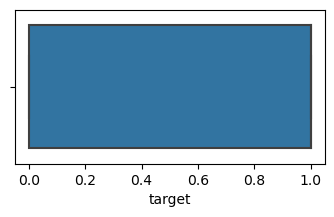

In [300]:
plt.figure(figsize=(4,2))
sns.boxplot(dataset.target)         # No Outliers in Target

In [301]:
dataset.nunique()  

# here we identify that the variables with few unique values are categorical and the variables with high unique values are numeric

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [302]:
numeric_cols=['age','trestbps','chol','thalach','oldpeak']

categorical_cols=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

#separating numeric and categorical columns

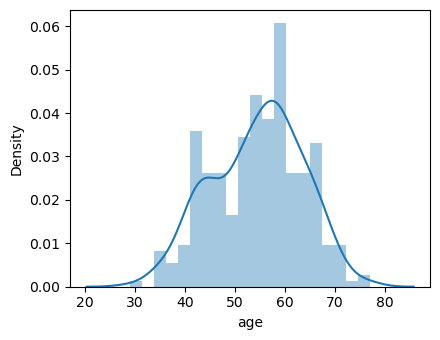

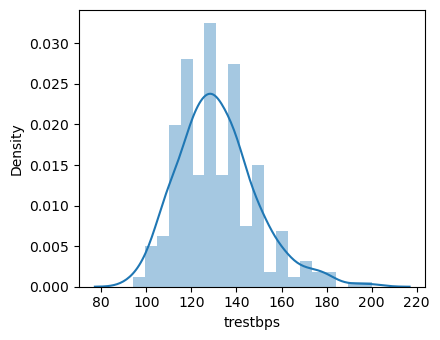

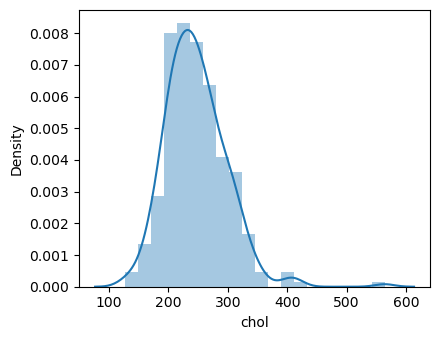

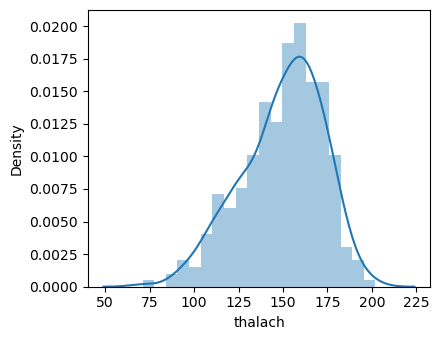

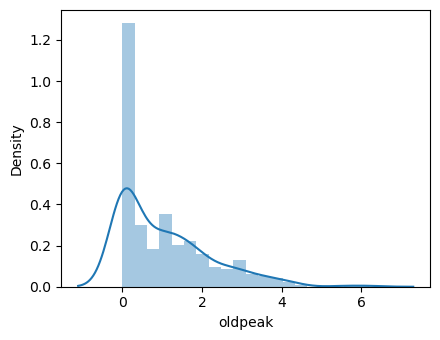

In [303]:
#Exploring Numerical data

for i in numeric_cols:
    plt.figure(figsize=(4.5,3.5))
    sns.distplot(dataset[i],bins=20)  
   
    plt.tight_layout()
    plt.show()

#### Analysis:
    
Age : The majority of patients are between 50 and 60 years age. Also there are less patients in the age range 45 to 50.

Trestbps : The resting blood pressure for most patients is between 110 and 140. Also patient traffic peaks at values around 115, 130 and 140.

Chol : Cholesterol values for most patients are between 200 to 300.

Thalach : The maximum heart rate achieved in most patients are between 150 to 160.

Oldpeak : Majority of patients are in the range 0 to 1.5.


#### 2.b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [304]:
#Statistics for Categorical variables

dataset[categorical_cols].describe().T  

,count,mean,std,min,25%,50%,75%,max
sex,302.0,0.682119,0.466426,0.0,0.0,1.0,1.0,1.0
cp,302.0,0.963576,1.032044,0.0,0.0,1.0,2.0,3.0
fbs,302.0,0.149007,0.356686,0.0,0.0,0.0,0.0,1.0
restecg,302.0,0.526490,0.526027,0.0,0.0,1.0,1.0,2.0
exang,302.0,0.327815,0.470196,0.0,0.0,0.0,1.0,1.0
slope,302.0,1.397351,0.616274,0.0,1.0,1.0,2.0,2.0
ca,302.0,0.718543,1.006748,0.0,0.0,0.0,1.0,4.0
thal,302.0,2.314570,0.613026,0.0,2.0,2.0,3.0,3.0
target,302.0,0.543046,0.498970,0.0,0.0,1.0,1.0,1.0


In [305]:
categorical=dataset[categorical_cols]
categorical.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


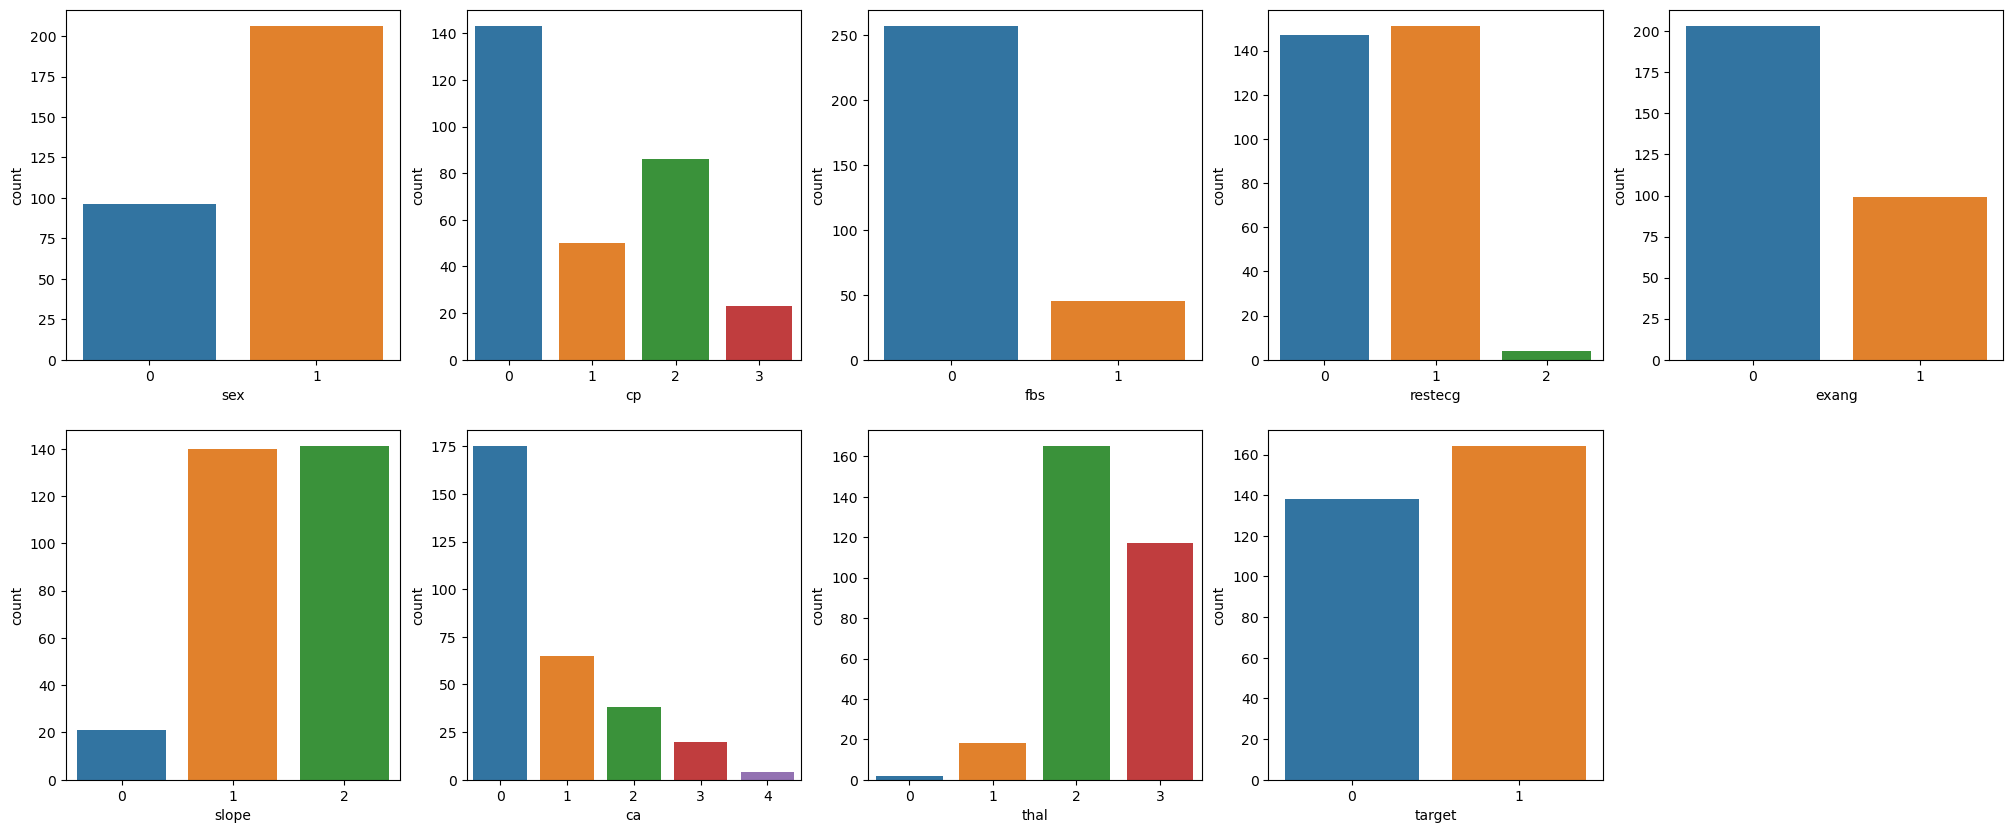

In [306]:
# count plot for categorical variables

plt.figure(figsize=(25,10))
for i in range(9):
    plt.subplot(2,5,i+1)
    sns.countplot(x= categorical_cols[i], data=categorical)  
   

#### Analysis from the above Count plot

1. Sex (1 = male; 0 = female):The count of Male patient is almost double that of Females.

    
2. cp (Chest pain type): Chest pain of Type 0 is highest observation value in patients, followed by type 2.

    
3. fbs (Fasting blood sugar > 120 mg/dl (1 = true; 0 = false): Majority of patients have fasting Blood Sugar <120 mg/dl.

    
4. restecg (Resting electrocardiographic results): Most common observations are 0 and 1 while there are very less patients with       values 2.

    
5. exang (Exercise induced angina (1 = yes, 0 = no)): Almost half of the patients have Exercise induced angina.

    
6. slope (Slope of the peak exercise ST segment): The minimum observation value is 0 and other two observations are almost equal 

    
7. ca (Number of major vessels (0-3) colored by fluoroscopy): Mostly the number of large vessels colored by fluoroscopy is     
    absent. 

    
8. thai (3 = normal; 6 = fixed defect; 7 = reversible defect): Majority of patients are in observations 2 followed by 3 which is 
    normal.

    
9. target(1 or 0): More than half of the patients have a risk of heart attack.


#### 2.c.	Study the occurrence of CVD across the Age category

<AxesSubplot:xlabel='age', ylabel='count'>

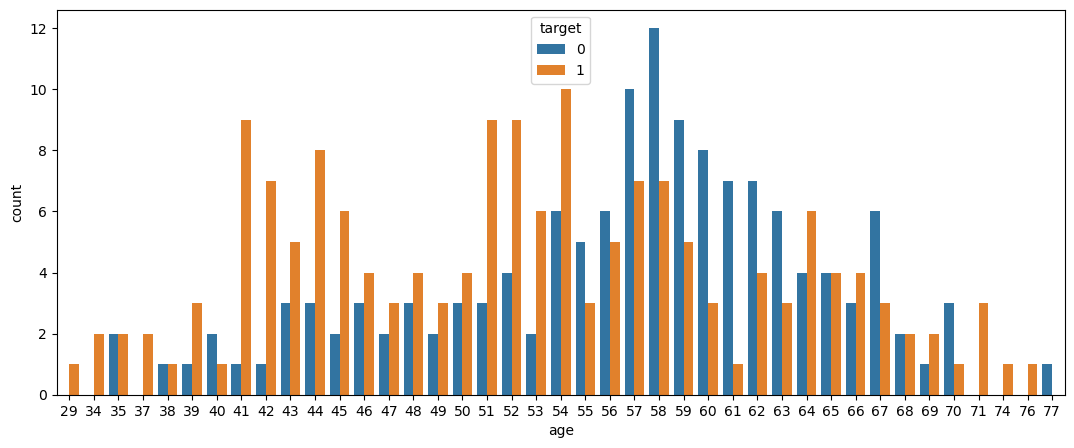

In [307]:
#Occurrence of CVD across the Age category

plt.figure(figsize=(13,5))
sns.countplot(x='age', data=dataset, hue='target')


It can be observed that people between age 41-45 and 51-54 are more exposed to CVD (target=1)

#### 2.d.	Study the composition of all patients with respect to the Sex category

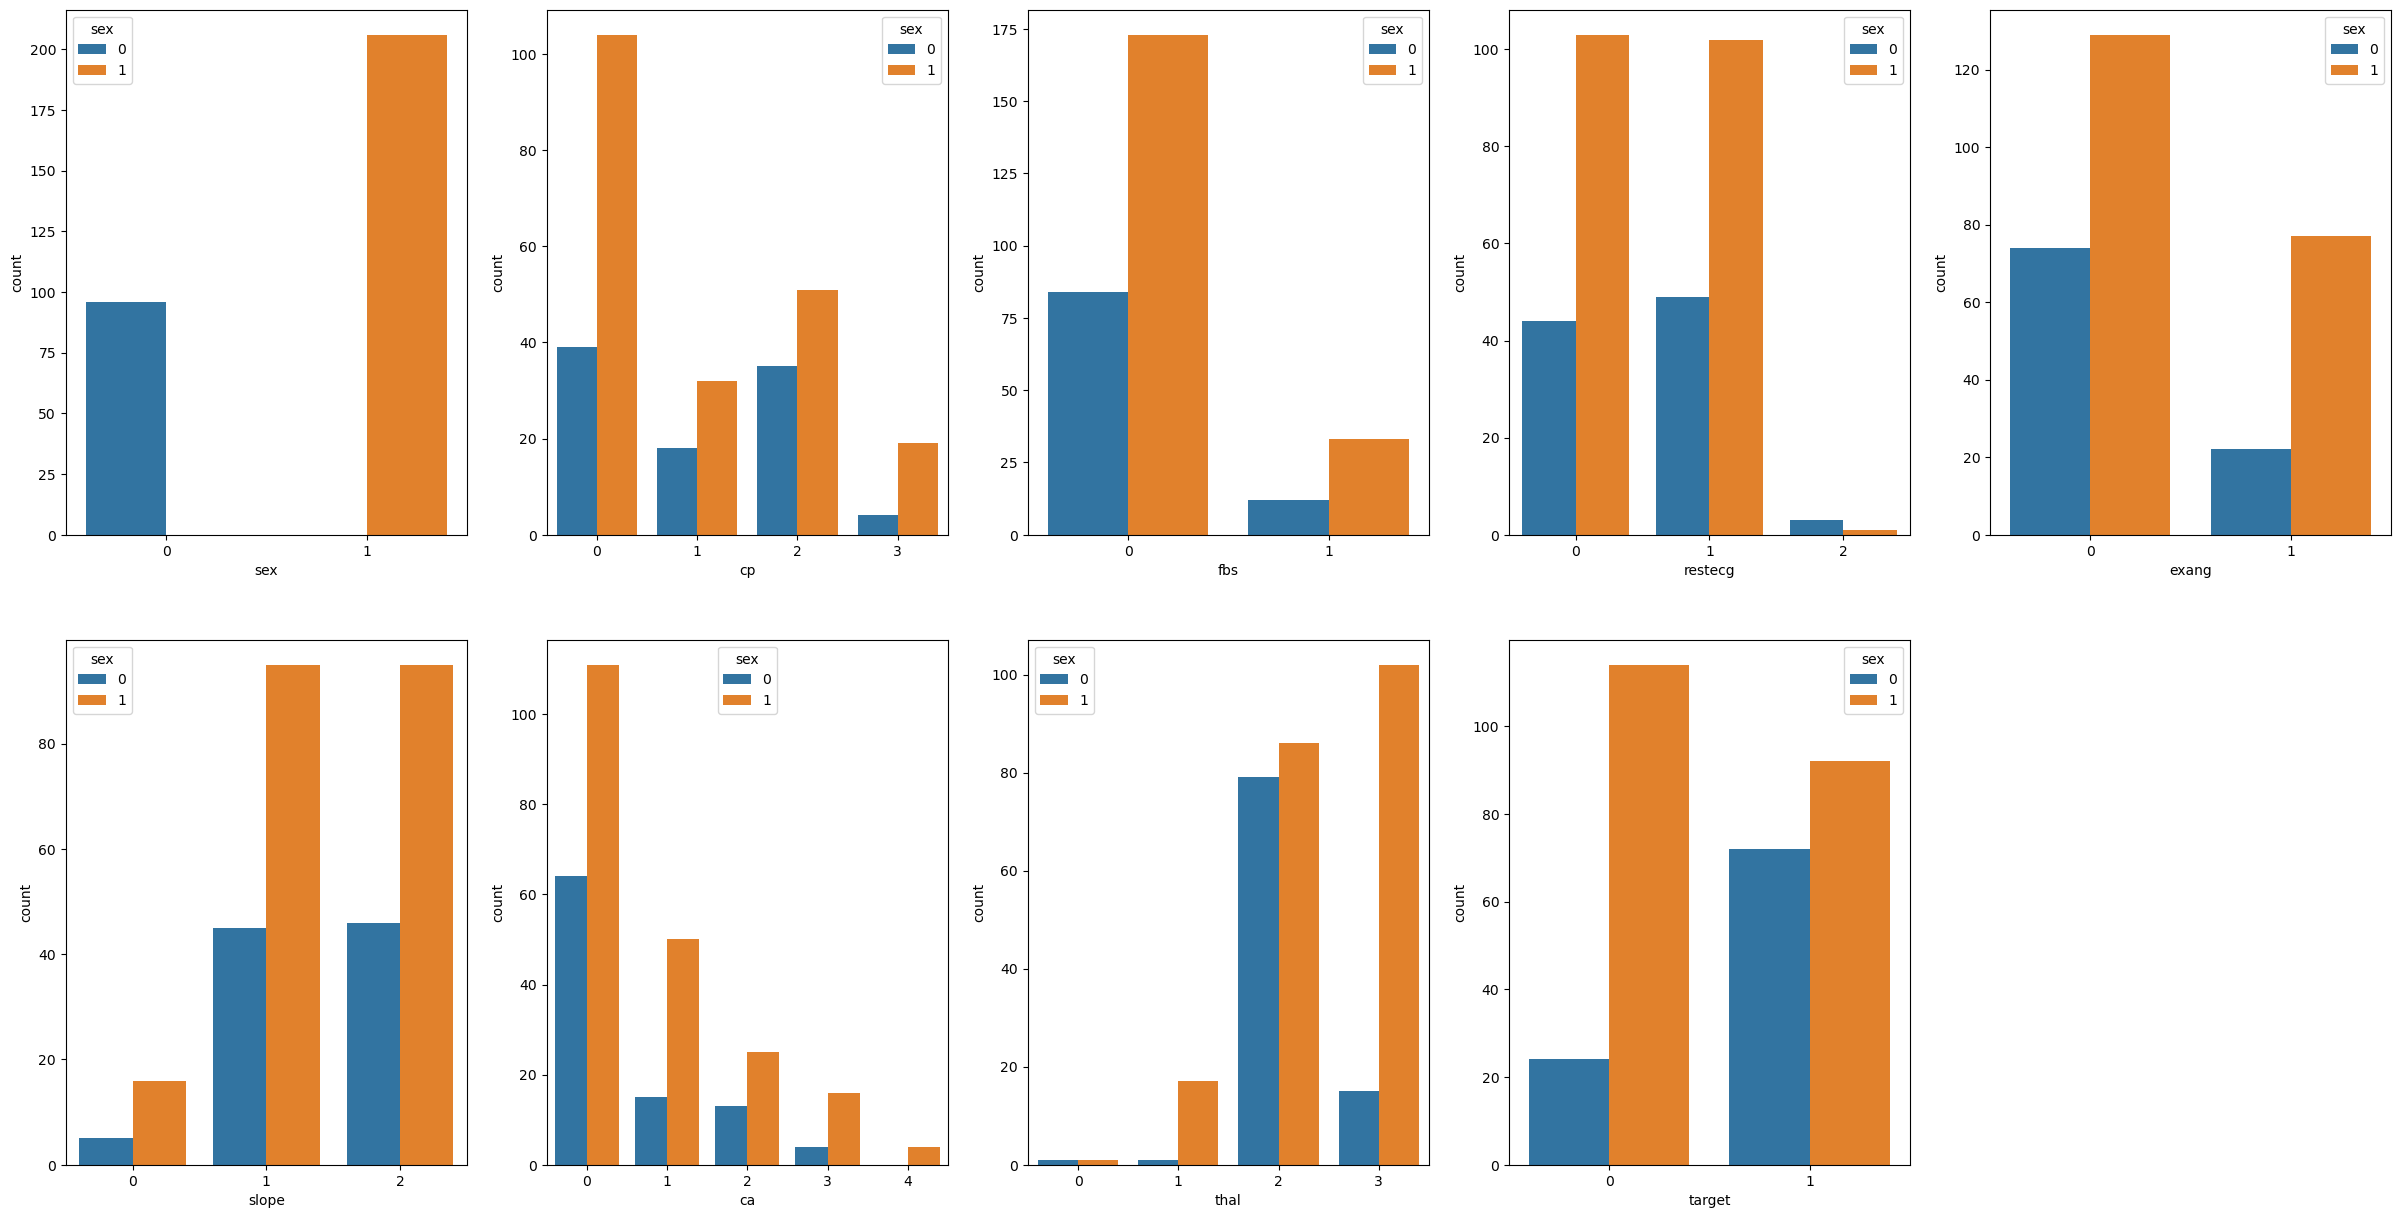

In [308]:
#composition of patients with respect to Sex category

plt.figure(figsize=(30,15))
for i in range(9):
    plt.subplot(2,5,i+1)
    sns.countplot(x= categorical_cols[i], data=categorical, hue='sex')  

After observing the composition of all patients with respect to the Sex category, we can say that 'Males' are more exposed to CVD

#### 2.e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<AxesSubplot:xlabel='trestbps', ylabel='count'>

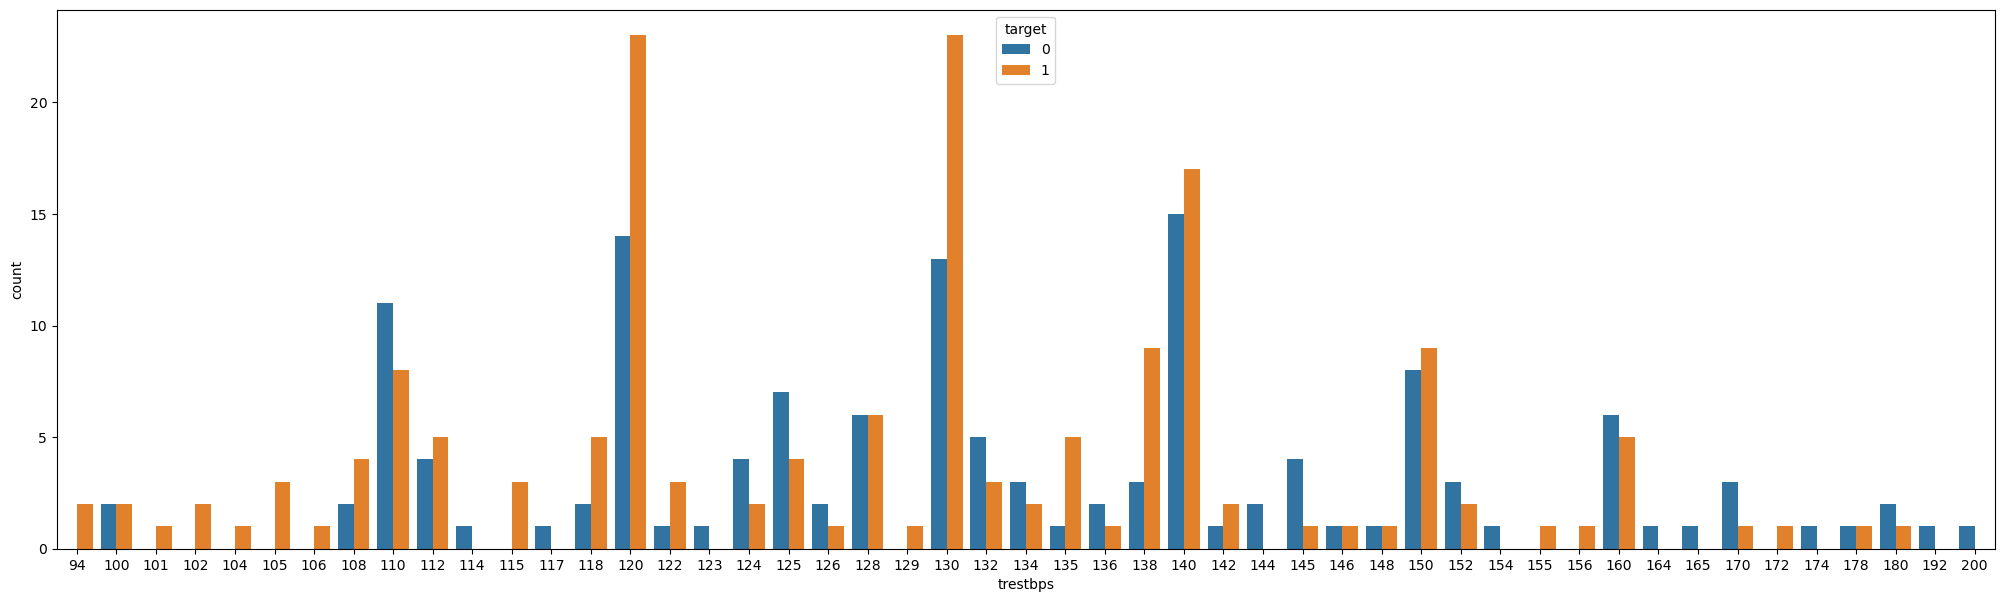

In [309]:
plt.figure(figsize=(25,7))
sns.countplot(x= 'trestbps', data= dataset, hue='target') 

It is observed that patients are highly susceptible to heart attacks if the resting blood pressure (trestbps) values are 120, 130 and 140. 

#### 2.f.	Describe the relationship between cholesterol levels and a target variable

<AxesSubplot:xlabel='chol', ylabel='count'>

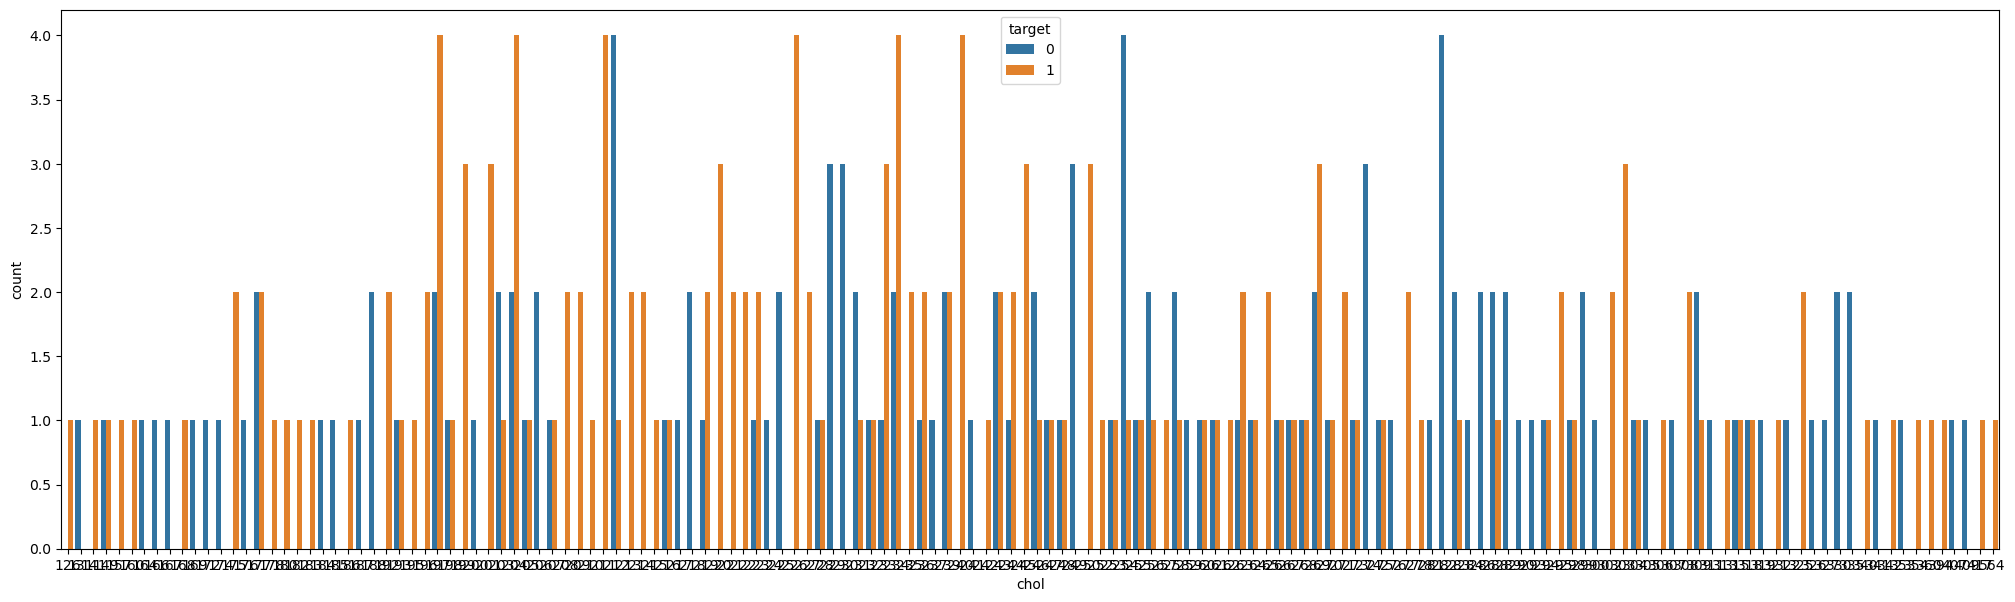

In [310]:
plt.figure(figsize=(25,7))
sns.countplot(x= 'chol', data= dataset, hue='target') 

In [311]:
df=dataset.groupby('target')['chol']

<AxesSubplot:title={'center':'Cholesterol for Target=1'}>

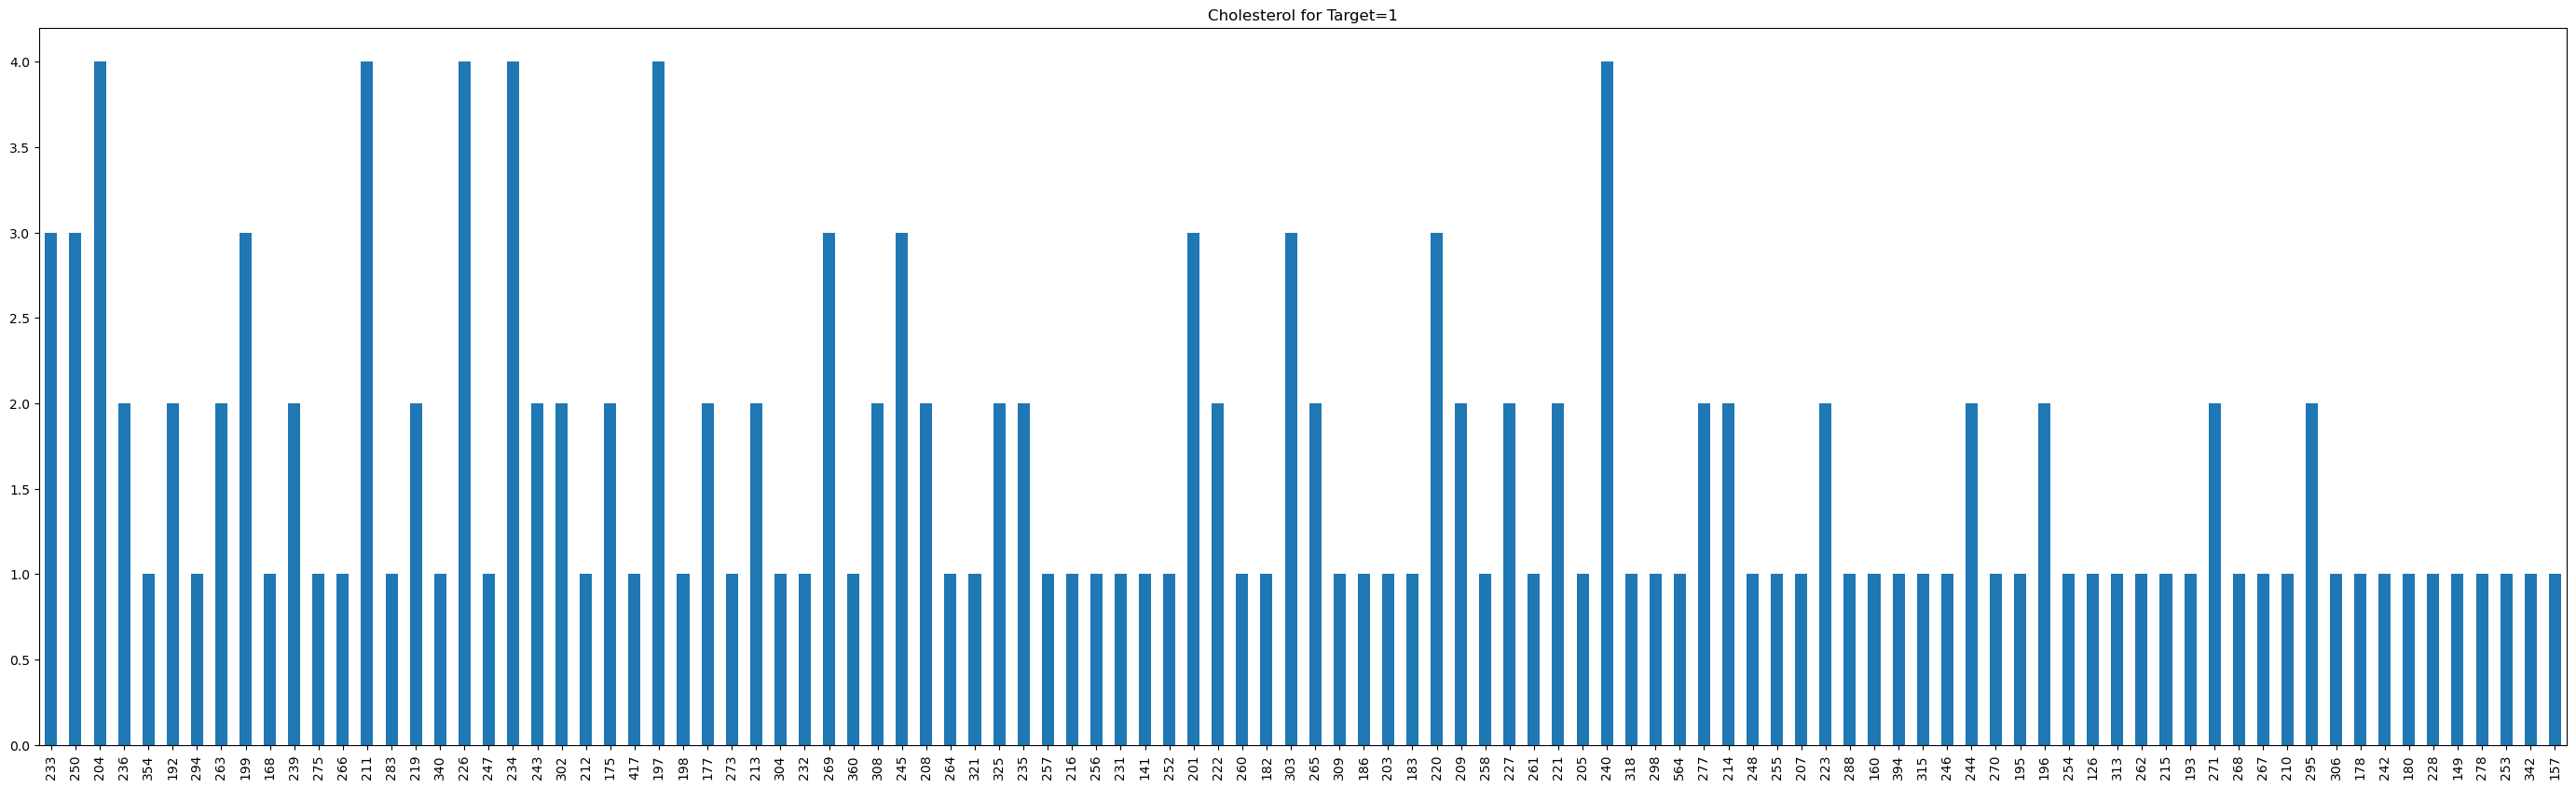

In [312]:
#cholesterol graph for Target=1

df.get_group(1).value_counts(sort=False).plot(kind='bar',title="Cholesterol for Target=1", figsize=(35,10))

<AxesSubplot:title={'center':'Cholesterol for Target=0'}>

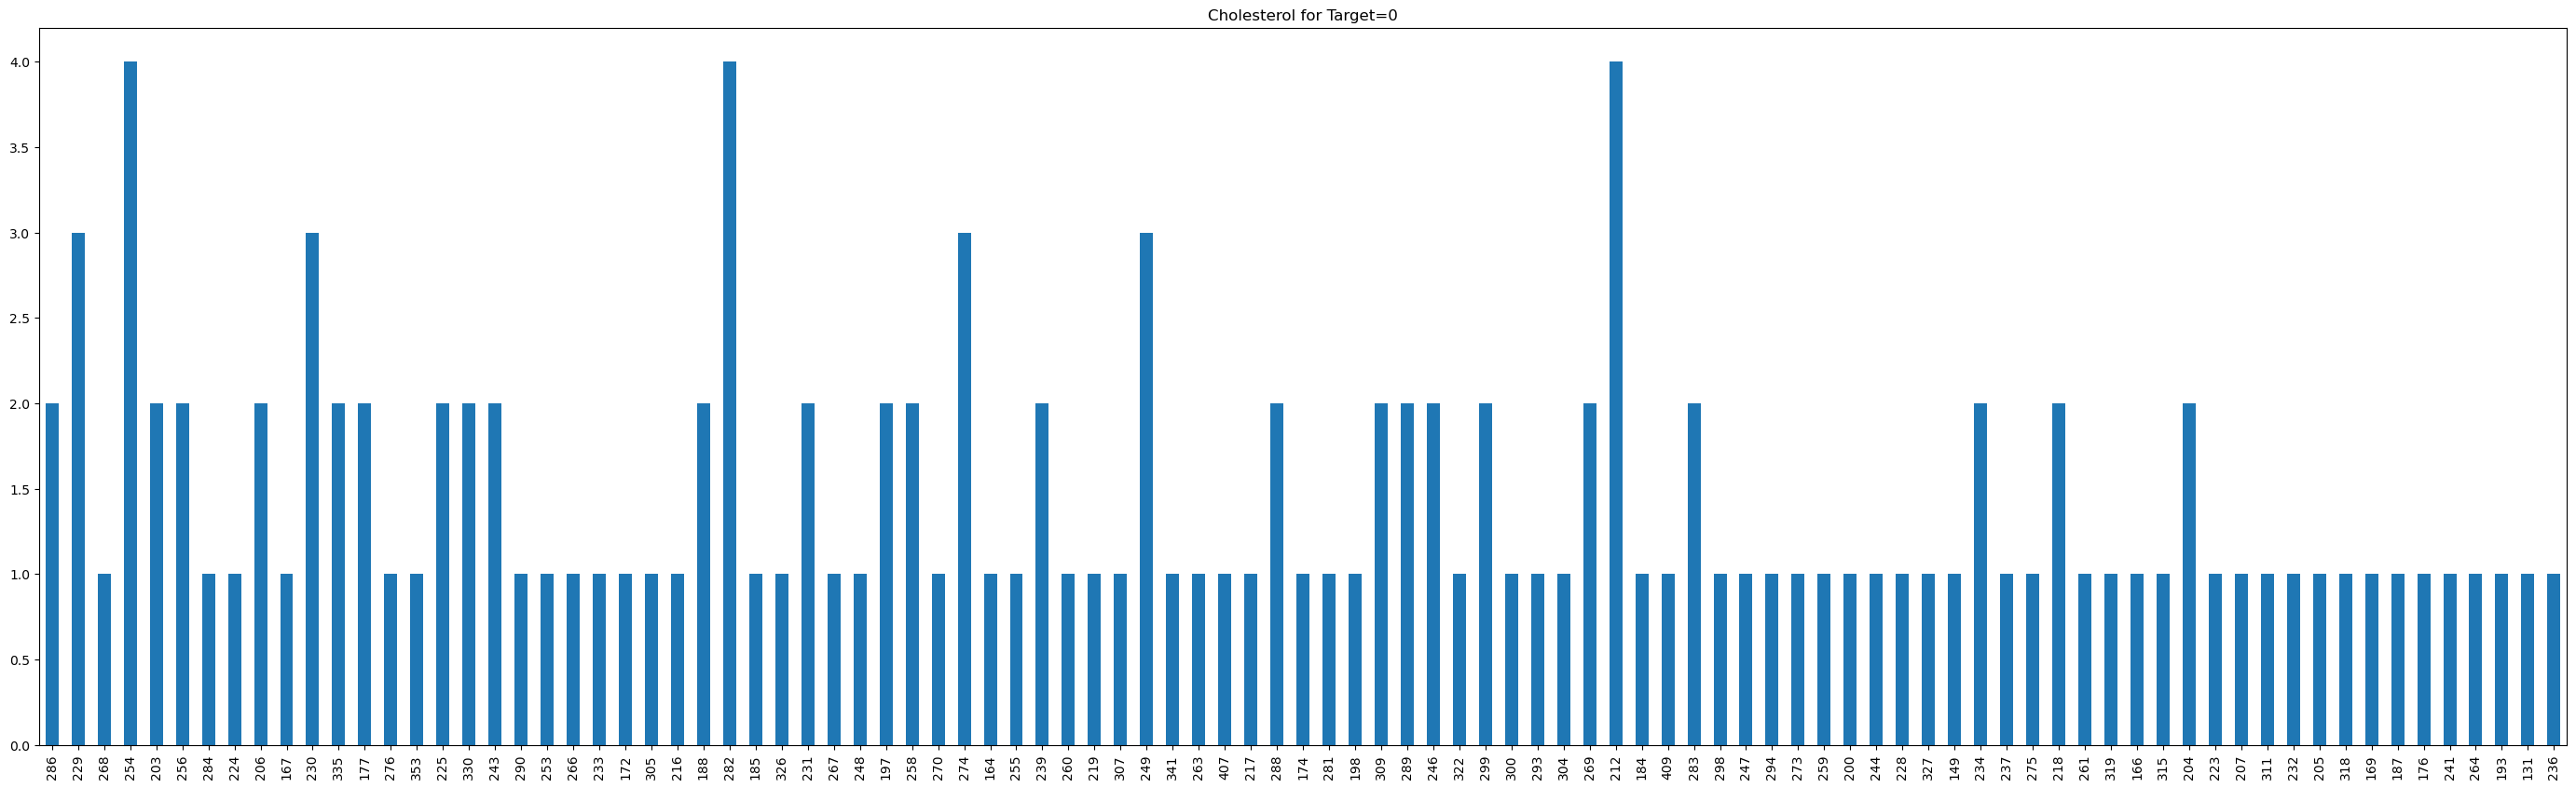

In [313]:
#cholesterol graph for Target=0

df.get_group(0).value_counts(sort=False).plot(kind='bar',title="Cholesterol for Target=0",figsize=(35,10))

In [314]:
dataset[['chol', 'target']].corr()  #Correlation between Cholesterol value and Target

,chol,target
chol,1.000000,-0.081437
target,-0.081437,1.000000


From the above graphs, we can say that it is difficult to predict patients having a heart attack using cholesterol values. 

The correlation between the two variables is also negative.

We can also say that there are chances of having a heart attack for Cholestrol values between 190 to 250

#### 2.g.	State what relationship exists between peak exercising and the occurrence of a heart attack

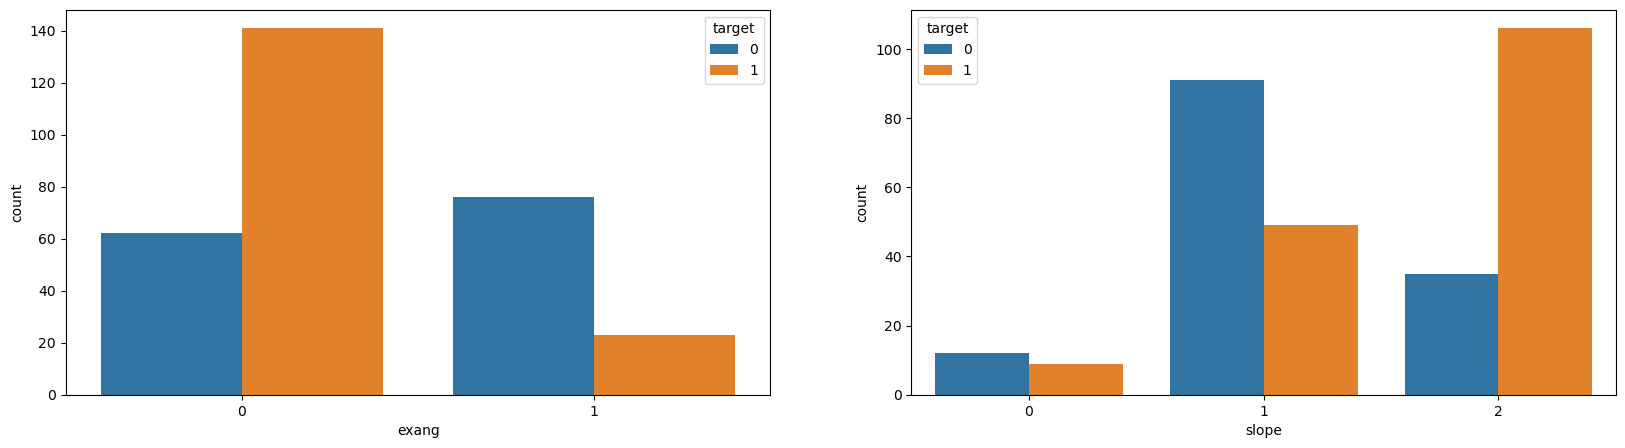

In [315]:
cols=['exang','slope']
plt.figure(figsize=(20,5))
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    sns.countplot(x= cols[i],hue='target', data=dataset) 

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

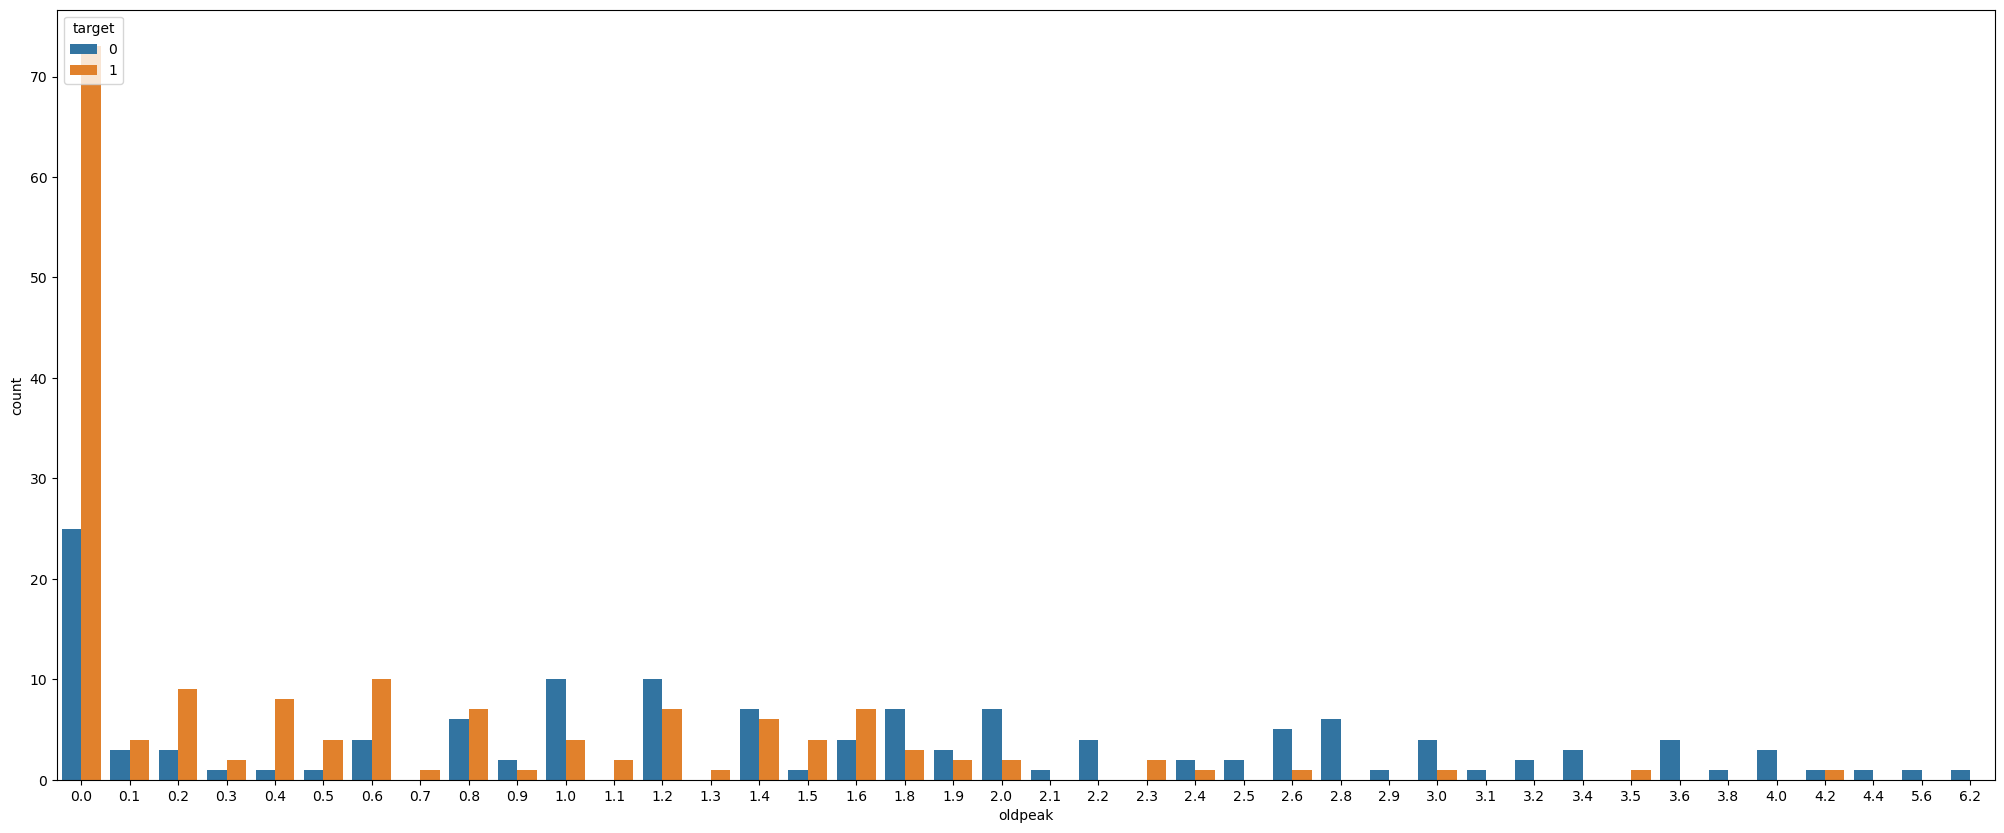

In [316]:
plt.figure(figsize=(25,10))
sns.countplot(x= dataset['oldpeak'],hue='target', data=dataset)

exang: Occurance of heat attacks in Exercise induced angina is less and it can be seen that patients with no exercise induced angina suffers from heart attacks.

slope: occurance of heart attack is highest where Slope of the peak exercise ST segment value is 2.

oldpeak: Occurance of heart attack is highest where oldpeak value is 0

#### 2.h.	Check if thalassemia is a major cause of CVD.

<AxesSubplot:xlabel='thal', ylabel='count'>

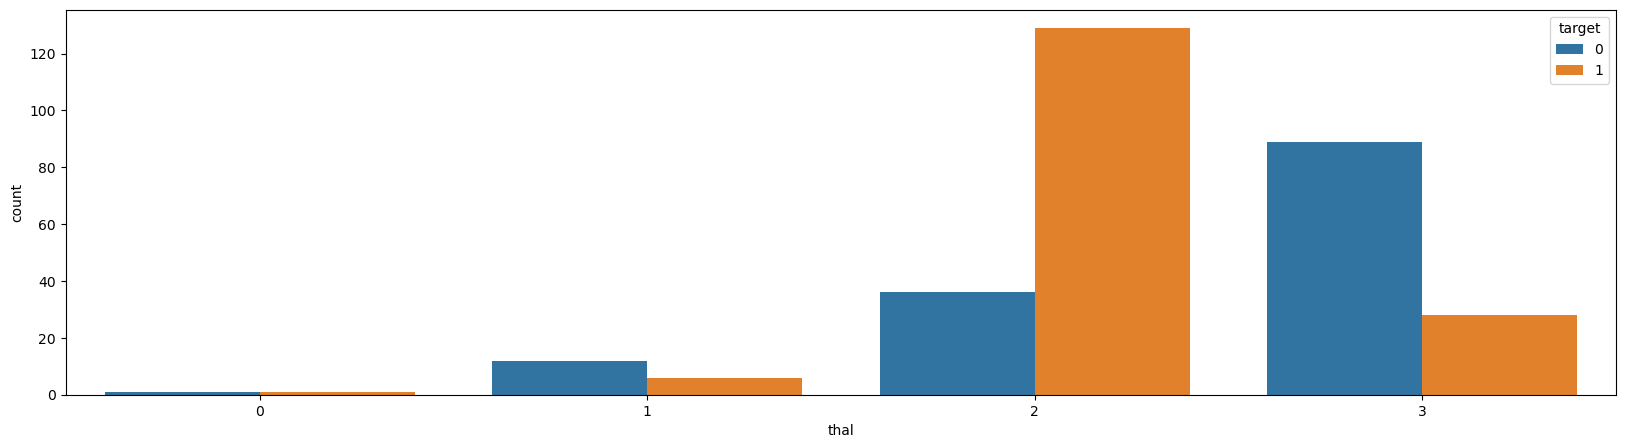

In [317]:
plt.figure(figsize=(20,5))
sns.countplot(x= dataset['thal'],hue='target', data=dataset)

Patients having thal value as 2 have high risk of CVD

Also from the below heatmap, we can see that correlation between 'thal' and 'target' is -0.34, so 'thal' is not a major cause of CVD.

#### 2.i.	List how the other factors determine the occurrence of CVD

<AxesSubplot:>

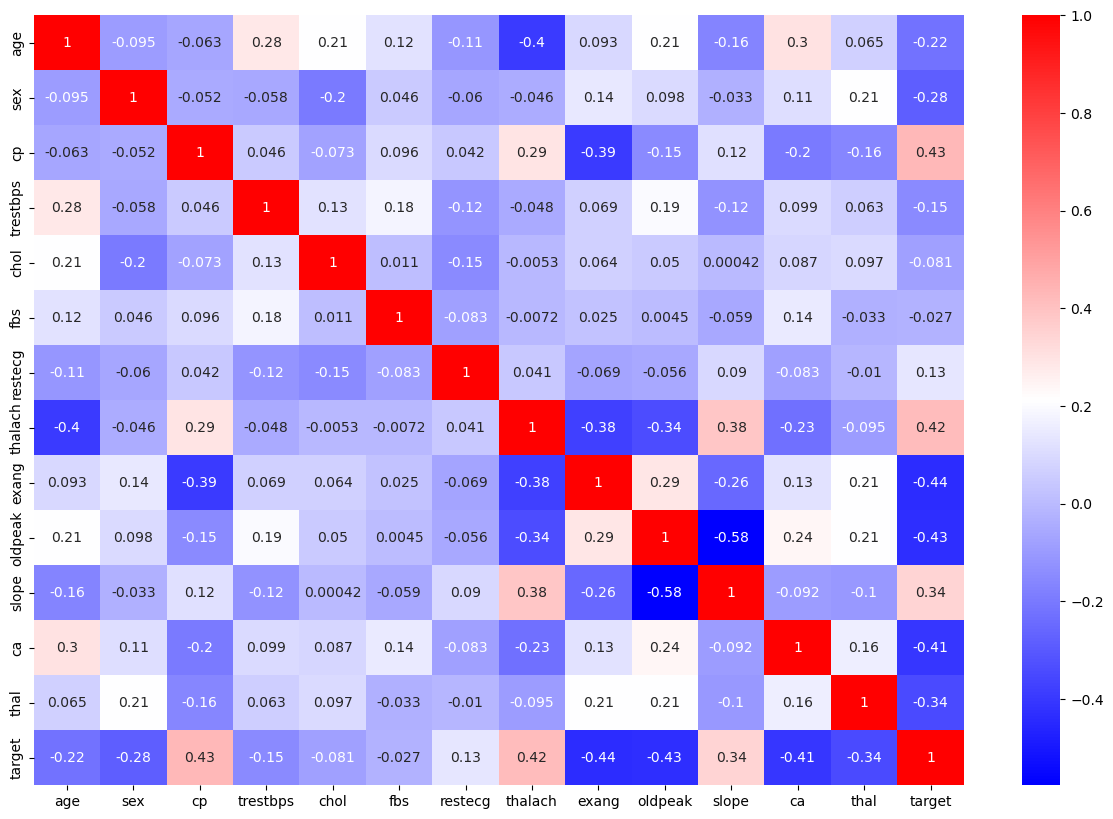

In [318]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='bwr',annot=True)

From the above heat map we can conclude that 'Chest pain(cp)' and 'Maximum heart rate(thalach)' are the main triggers for occurance of CVD with correlation values 0.43 and 0.42 respectively.  

'Slope of the peak exercise ST segment(slope)' is also moderately correlated with 'target' variable(correlation value 0.34) and so is also a cause of CVD.

We can observe that 'thalach' variable is also highly correlated with 'cp' and 'slope' variables.

In general we can say that the "target" variable correlates with more than one variables. So there are multiple causes that can trigger CVD in patients.

#### 2.j.	Use a pair plot to understand the relationship between all the given variables

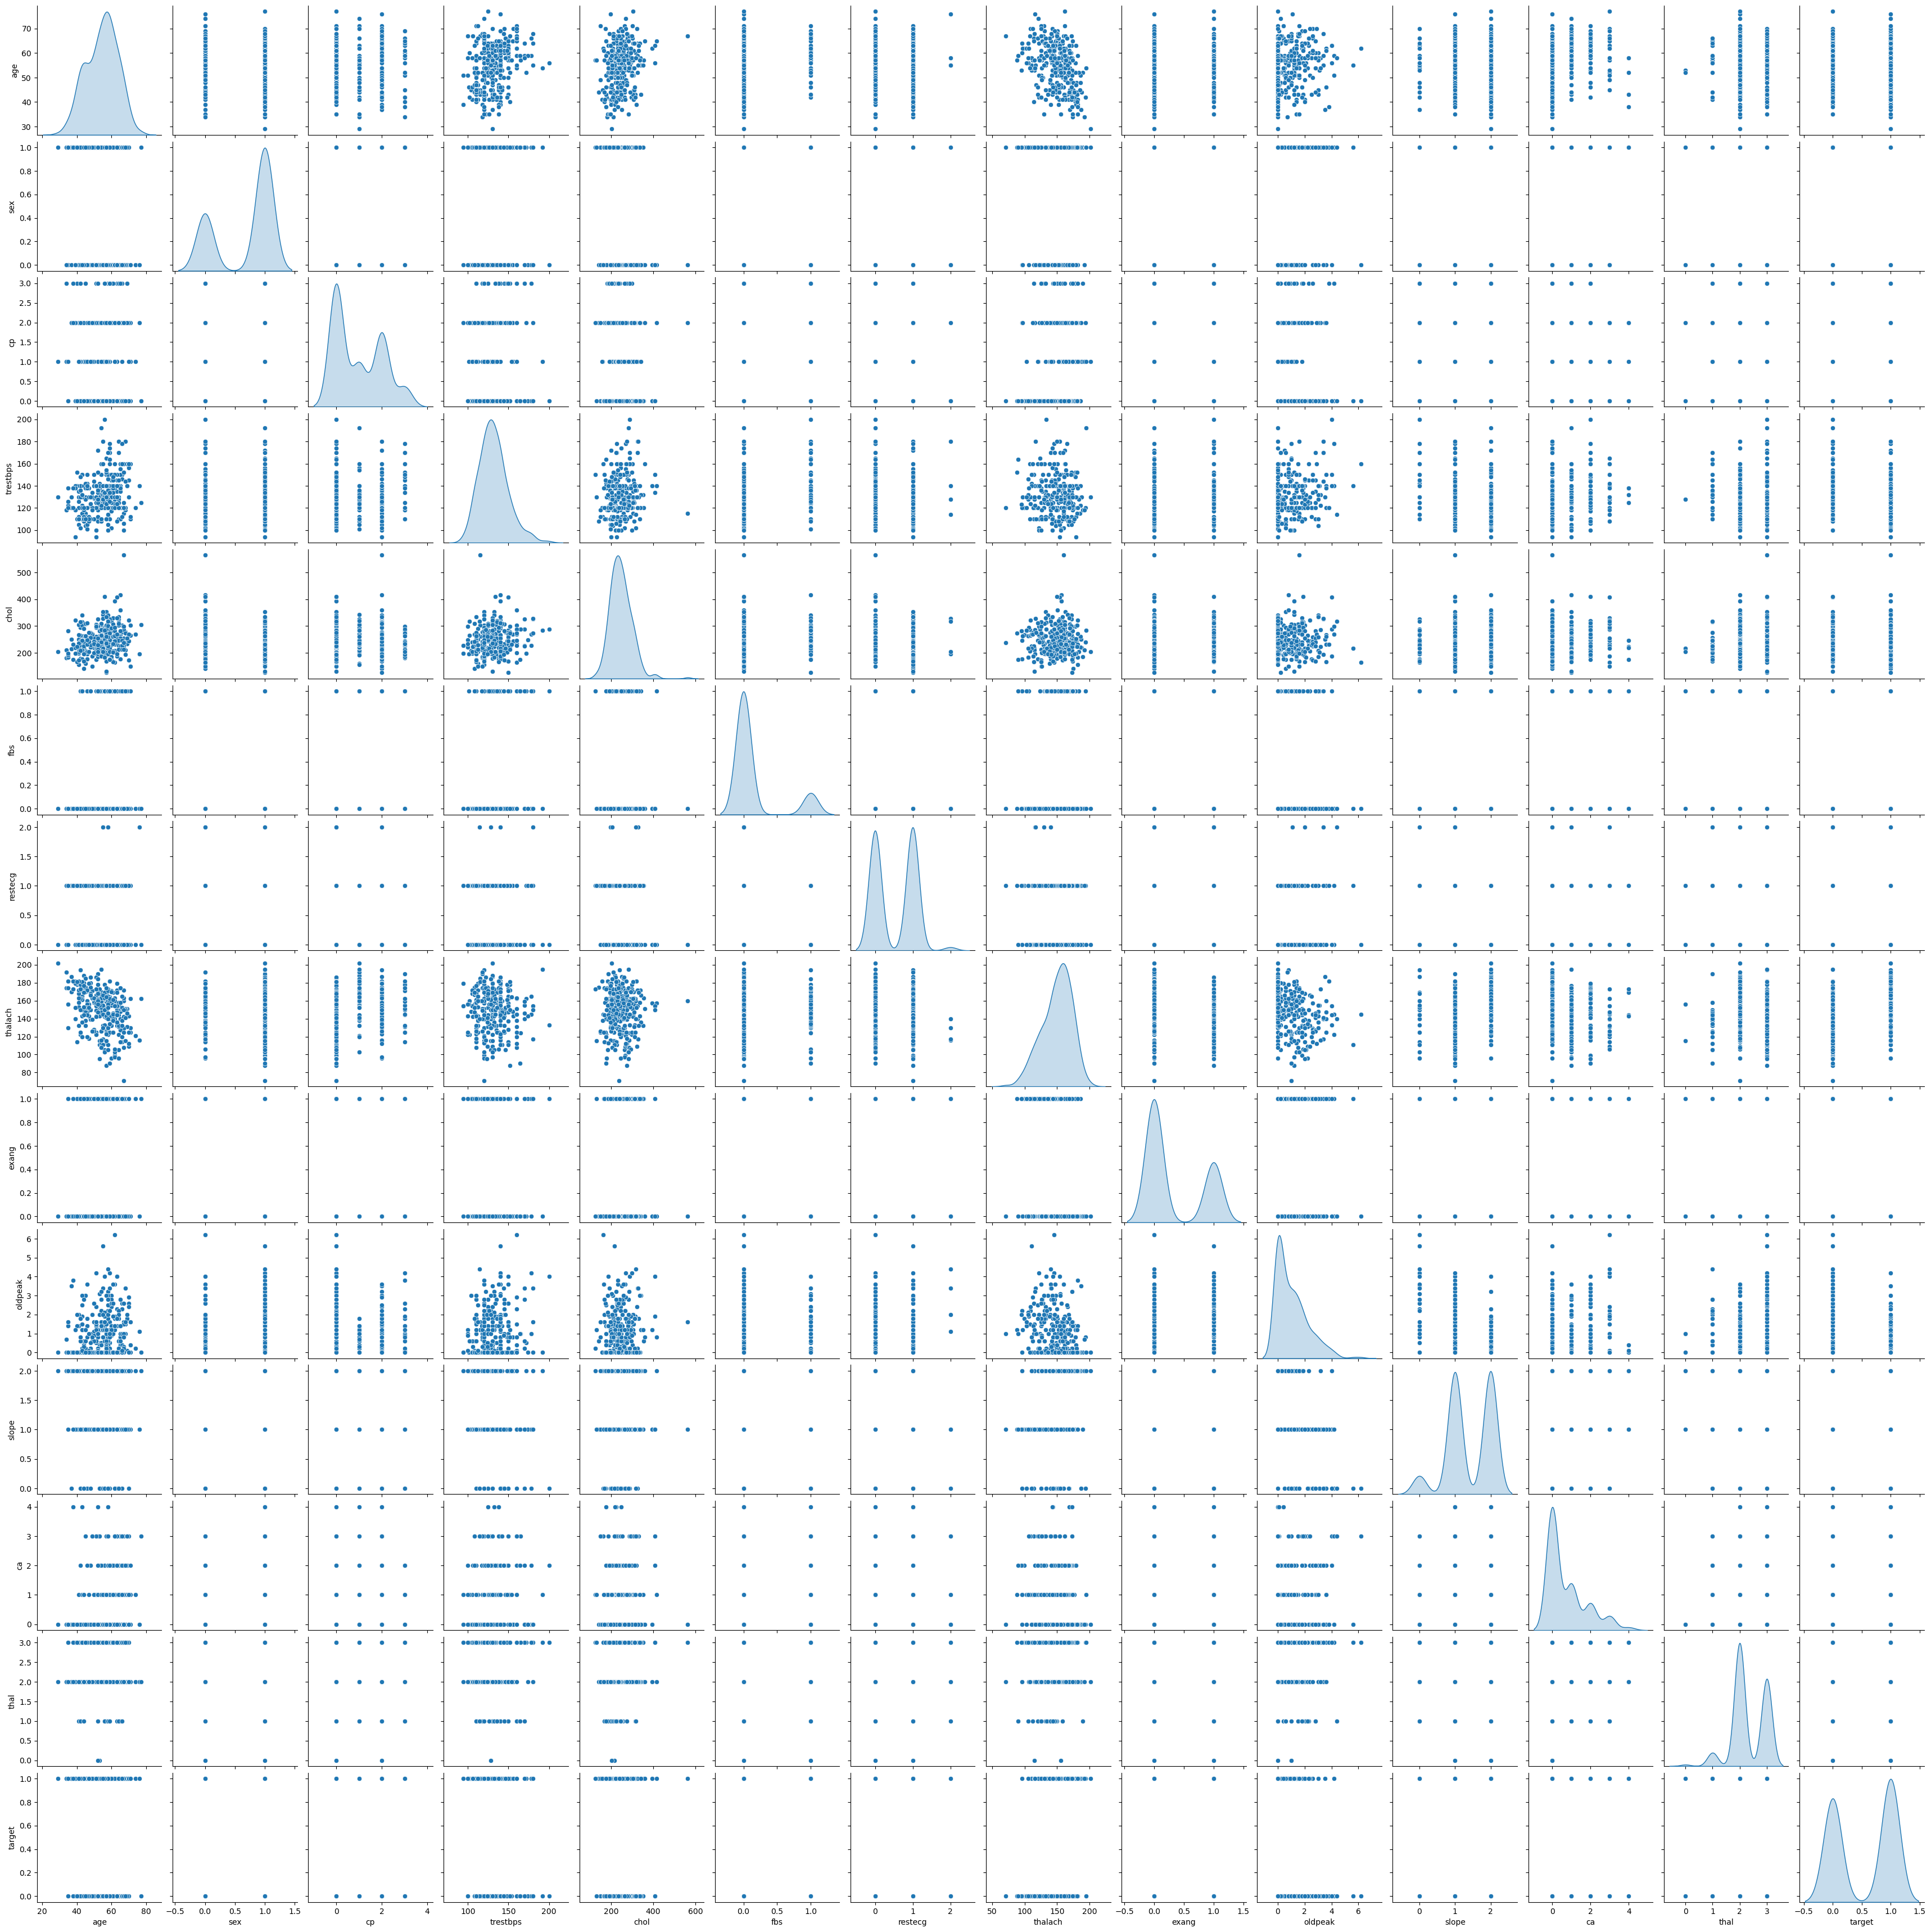

In [319]:
sns.pairplot(dataset,diag_kind='kde')
plt.show()


We can see that Pairplot is not of much help instead Heatmap provides better insights of relationship between all the variables.

We have already noted "target" variable correlates maximum with "cp", "thalach" and "slope"

"age' variable is highly correlated to "trestbps" and "ca"

"thalach" variable is highly correlated with "cp" and "slope" variables

"exang' variable is highly correlated to "oldpeak"

"chol" and "fbs" have least correlation with "target" variable


### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

#### Preparing data for Modelling

In [320]:
#dropping columns "chol" and "fbs" as they have very low correlation with target

dataset.drop(['chol','fbs'], axis=1, inplace = True)

In [321]:
dataset.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


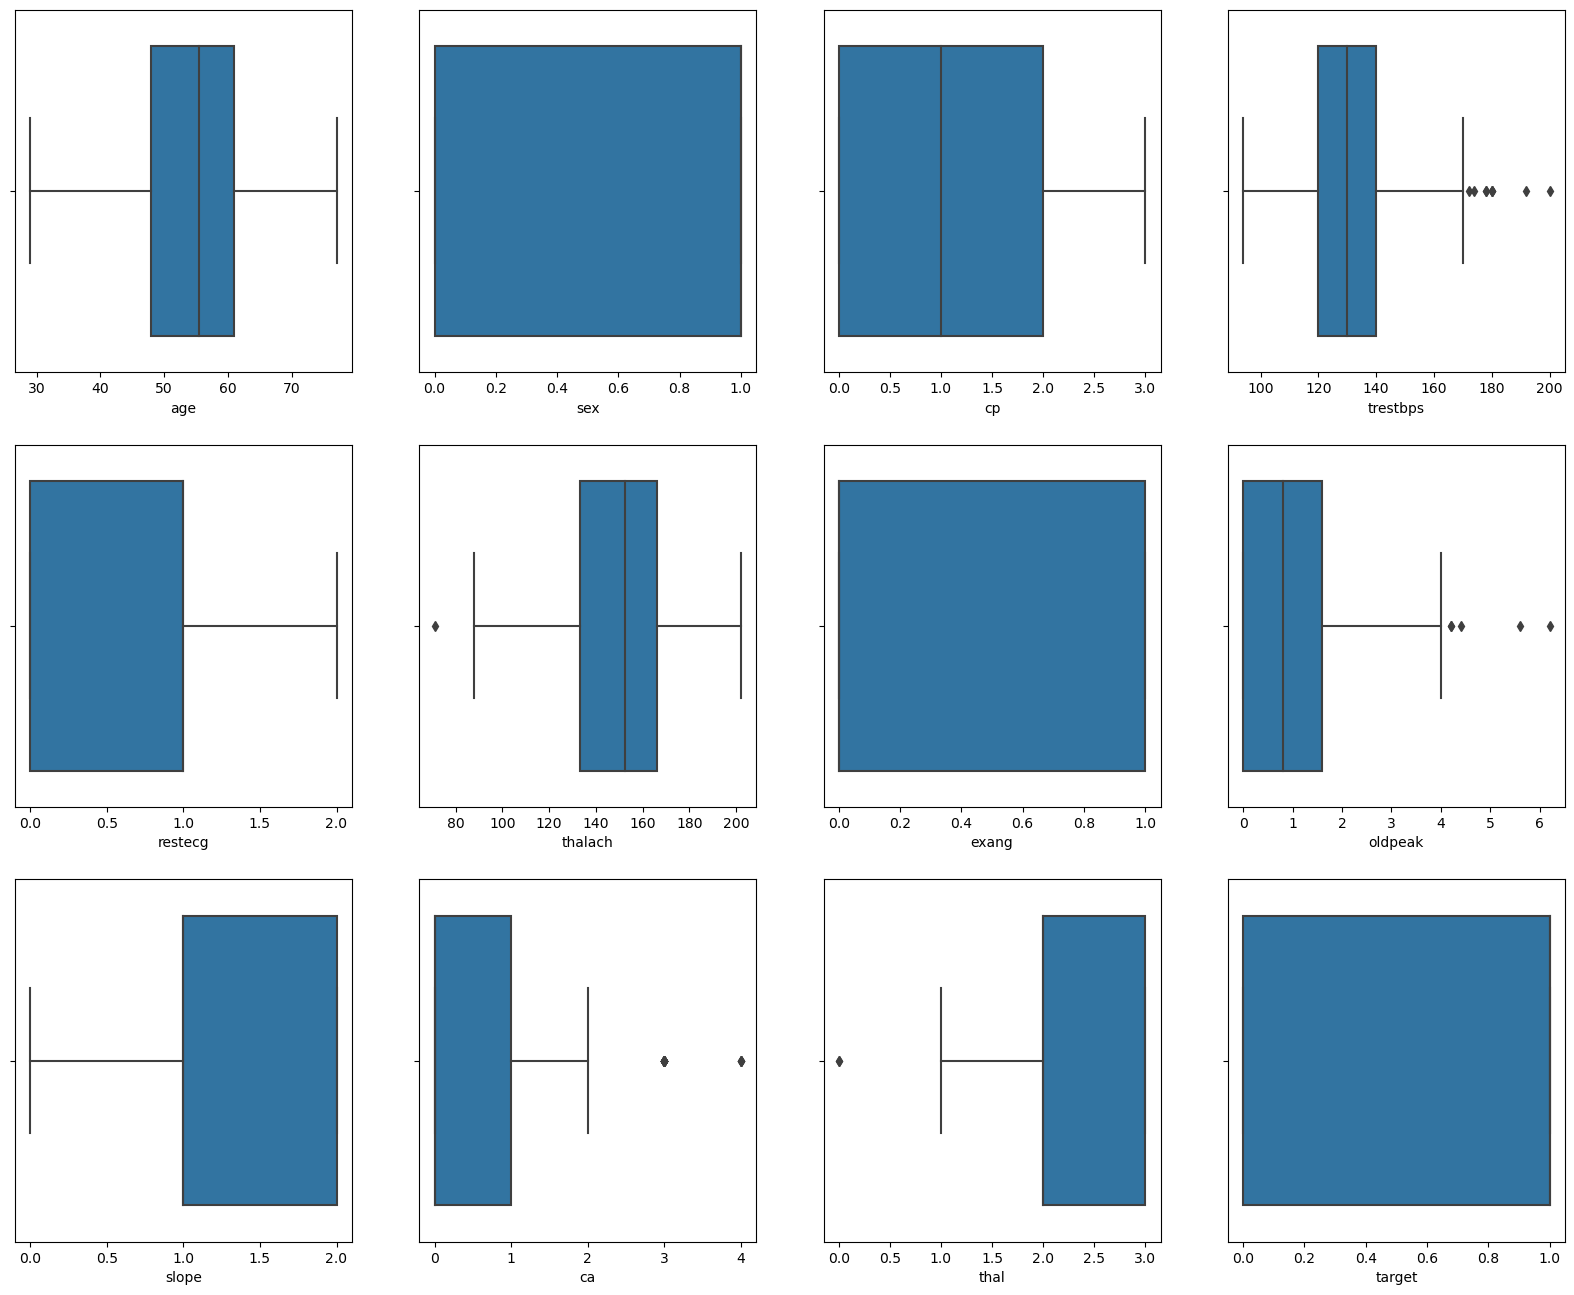

In [322]:
#checking outliers

plt.figure(figsize=(20,16))
for i in range(12):
    plt.subplot(3,4,i+1)
    sns.boxplot(dataset.iloc[:,i]) 


In [323]:
#Treating Outliers for "trestbps"

Q3 = dataset.trestbps.quantile(0.75)
Q1 = dataset.trestbps.quantile(0.25)
IQR = Q3-Q1
upper = Q3 + 1.5 * (IQR)

In [324]:
dataset[dataset.trestbps > upper] #number of outliers in "trestbps"

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,1,162,0,0.5,2,0,3,1
101,59,1,3,178,0,145,0,4.2,0,0,3,1
110,64,0,0,180,1,154,1,0.0,2,0,2,1
203,68,1,2,180,0,150,1,1.6,1,0,3,0
223,56,0,0,200,0,133,1,4.0,0,2,3,0
241,59,0,0,174,1,143,1,0.0,1,0,2,0
248,54,1,1,192,0,195,0,0.0,2,1,3,0
260,66,0,0,178,1,165,1,1.0,1,2,3,0
266,55,0,0,180,2,117,1,3.4,1,0,2,0


In [325]:
dataset[dataset.trestbps > upper].shape 

(9, 12)

In [326]:
dataset[dataset.trestbps > upper].shape[0]/dataset.shape[0]*100  #percentage of outliers in "trestbps"


2.980132450331126

In [327]:
trestbps_index= dataset[dataset.trestbps > upper].index  #indexes of outliers in "trestbps"

In [328]:
# since our dataset is small we shall not remove the outliers and treat it using capping method

dataset.loc[trestbps_index,'trestbps']=upper  #assigning upper value to outliers

In [329]:
dataset.loc[trestbps_index,'trestbps']  #outliers capped to upper

8      170
101    170
110    170
203    170
223    170
241    170
248    170
260    170
266    170
Name: trestbps, dtype: int64

In [330]:
#Treating Outliers for "oldpeak" using capping method

Q3 = dataset.oldpeak.quantile(0.75)
Q1 = dataset.oldpeak.quantile(0.25)
IQR = Q3-Q1
upper_oldpeak = Q3 + 1.5 * (IQR)


In [331]:
dataset[dataset.oldpeak > upper_oldpeak].shape  #number of outliers in "oldpeak"

(5, 12)

In [332]:
oldpeak_index = dataset[dataset.oldpeak > upper_oldpeak].index   #indexes of outliers in "oldpeak"

dataset.loc[oldpeak_index,'oldpeak'] = upper_oldpeak    #assigning upper value to outliers

In [334]:
dataset.loc[oldpeak_index,'oldpeak']   #capped outliers

101    4.0
204    4.0
221    4.0
250    4.0
291    4.0
Name: oldpeak, dtype: float64

In [335]:
#Treating Outliers for "thalach" using capping method

Q3 = dataset.thalach.quantile(0.85)
Q1 = dataset.thalach.quantile(0.15)   
IQR = Q3-Q1
lower = Q3 - 1.5 * (IQR)

#we are changing the quantile value to 85% and 15% as there are lot of outliers with 75% and 25% and we dont want to lose lot of information capping them.

In [336]:
dataset[dataset.thalach < lower].shape #number of outliers in "thalach"

(8, 12)

In [337]:
thalach_index = dataset[dataset.thalach < lower].index  #indexes of outliers in "thalach"

dataset.loc[thalach_index ,'thalach'] = lower    #assigning upper value to outliers

In [338]:
dataset.loc[thalach_index ,'thalach']  #capped outliers

136    101.075
198    101.075
216    101.075
233    101.075
243    101.075
262    101.075
272    101.075
297    101.075
Name: thalach, dtype: float64

#### Encoding and Scaling of data

In [339]:
dataset1= dataset.copy()  #creating a copy of dataset to apply Encoding and Scaling

In [340]:
dataset1.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,1,163.0,1,0.6,2,0,2,1


In [341]:
#separating numerical and Categorical columns

numeric=['age','trestbps','thalach','oldpeak']

categorical=['sex','cp','restecg','exang','slope','ca','thal']


In [342]:
dataset1[numeric].head()

,age,trestbps,thalach,oldpeak
0,63,145,150.0,2.3
1,37,130,187.0,3.5
2,41,130,172.0,1.4
3,56,120,178.0,0.8
4,57,120,163.0,0.6


In [343]:
#scaling numeric columns

ss = StandardScaler()

dataset1[numeric] = ss.fit_transform(dataset1[numeric])   

In [344]:
dataset1.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.828927,0,0.007957,0,1.147606,0,0,1,1
1,-1.928548,1,2,-0.075902,1,1.672935,0,2.230096,0,0,2,1
2,-1.485726,0,1,-0.075902,0,0.997944,0,0.335739,2,0,2,1
3,0.174856,1,1,-0.679121,1,1.267940,0,-0.205506,2,0,2,1
4,0.285561,0,0,-0.679121,1,0.592949,1,-0.385921,2,0,2,1


In [345]:
#Encoding Categorical Columns

dataset_dummies = pd.get_dummies(dataset1, columns=categorical, drop_first=True)

In [346]:
dataset_dummies.head()

,age,trestbps,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,restecg_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,0.828927,0.007957,1.147606,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,-0.075902,1.672935,2.230096,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,-0.075902,0.997944,0.335739,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,-0.679121,1.267940,-0.205506,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,-0.679121,0.592949,-0.385921,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0


Our data is now ready for Modelling

In [347]:
#Defining our X and y

X = dataset_dummies.drop('target', axis=1)
y = dataset_dummies['target']

## Logistic Regression Model


In [363]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [364]:
log_reg = LogisticRegression()

log_reg.fit(train_X, train_y)

LogisticRegression()

In [365]:
print('Train Score: {}'.format(log_reg.score(train_X, train_y)))

print('Test Score: {}'.format(log_reg.score(test_X, test_y))) 

Train Score: 0.8483412322274881
Test Score: 0.8791208791208791


#### Metrics for Train set

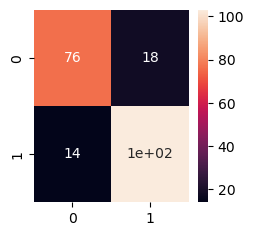

In [366]:
plt.figure(figsize=(2.5,2.5))
sns.heatmap(metrics.confusion_matrix(train_y, log_reg.predict(train_X)),annot=True);     #Confusion matrix for Train set

In [367]:
print(metrics.classification_report(train_y, log_reg.predict(train_X)))    #Classification Report for Train set

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        94
           1       0.85      0.88      0.87       117

    accuracy                           0.85       211
   macro avg       0.85      0.84      0.85       211
weighted avg       0.85      0.85      0.85       211



#### Metrics for Test set

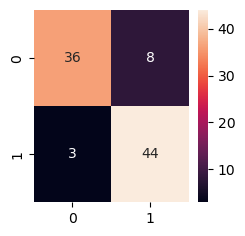

In [368]:
plt.figure(figsize=(2.5,2.5))
sns.heatmap(metrics.confusion_matrix(test_y, log_reg.predict(test_X)),annot=True);   #Confusion matrix Test set

In [369]:
print(metrics.classification_report(test_y, log_reg.predict(test_X)))     #Classification Report for Test Set

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.85      0.94      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



#### Applying Dimentionality Reduction techniques to check if we can further improve the Scores

#### Using PCA and Logistic Regression

In [377]:

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)     #components explaining 95% of data
X_trf = pca.fit_transform(X)


In [378]:
X_trf.shape   #we can see that dimention is reduced to 12 columns 

(302, 12)

In [380]:
trainP_X, testP_X, trainP_y, testP_y = train_test_split(X_trf, y, test_size=0.3)

log_reg = LogisticRegression()

log_reg.fit(trainP_X, trainP_y)

LogisticRegression()

In [381]:
print('Train Score: {}'.format(log_reg.score(trainP_X, trainP_y)))  

print('Test Score: {}'.format(log_reg.score(testP_X, testP_y)))   

Train Score: 0.8246445497630331
Test Score: 0.8131868131868132


We can see there is no improvement in the scores. Lets now try LDA method

#### Using LDA and Logistic Regression

In [382]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [383]:
X_ld = lda.fit_transform(X, y)
X_ld.shape    #we can see that dimention is reduced to 1 column 

(302, 1)

In [384]:
train_ld_X, test_ld_X, train_ld_y, test_ld_y = train_test_split(X_ld, y, test_size=0.3)

log_reg = LogisticRegression()

log_reg.fit(train_ld_X, train_ld_y)

LogisticRegression()

In [385]:
print('Train Score: {}'.format(log_reg.score(train_ld_X, train_ld_y)))  

print('Test Score: {}'.format(log_reg.score(test_ld_X, test_ld_y))) 

Train Score: 0.8625592417061612
Test Score: 0.9010989010989011


We can see improvement in the scores after applying LDA.


In [386]:
predict_ld_y=log_reg.predict(test_ld_X)

In [387]:
print(metrics.classification_report(train_ld_y, log_reg.predict(train_ld_X)))  #Report for Train set

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        96
           1       0.85      0.91      0.88       115

    accuracy                           0.86       211
   macro avg       0.87      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211



In [388]:
print(metrics.classification_report(test_ld_y, predict_ld_y))  #Classification Report for Test set

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.90      0.92      0.91        49

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91



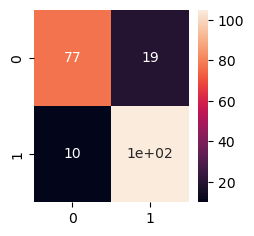

In [389]:
plt.figure(figsize=(2.5,2.5))
sns.heatmap(metrics.confusion_matrix(train_ld_y, log_reg.predict(train_ld_X)),annot=True);     #Confusion matrix for Train set

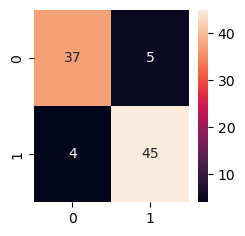

In [390]:
plt.figure(figsize=(2.5,2.5))
sns.heatmap(metrics.confusion_matrix(test_ld_y, predict_ld_y ), annot=True);   #Confusion matrix for Test set

### So we finalize our Logistic Regression Model using LDA

In [391]:
#Accuracy Score

accuracy = accuracy_score(test_ld_y,predict_ld_y)

print("Test Accuracy of Logistic Regression with LDA : {}".format(accuracy*100))

Test Accuracy of Logistic Regression with LDA : 90.10989010989012


In [392]:
#Cross Validation Score

scores = cross_val_score(log_reg, test_ld_X,test_ld_y, cv=5).mean()     #Model Performance

print("Cross-Validation Accuracy Scores: ", scores*100)

Cross-Validation Accuracy Scores:  88.0701754385965


## Random Forest Model

In [401]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [402]:
rfc=RandomForestClassifier()

rfc.fit(train_X,train_y)

RandomForestClassifier()

In [403]:
pred_y = rfc.predict(test_X)

In [404]:
print('Test accuracy of Random Forest : ', accuracy_score(test_y, pred_y)*100)

Test accuracy of Random Forest :  81.31868131868131


In [405]:
cross_val_score(rfc, train_X,train_y, cv=5)

array([0.74418605, 0.85714286, 0.78571429, 0.78571429, 0.78571429])

In [406]:
cross_val_score(rfc, train_X,train_y, cv=5).mean()  #training score

0.7869324473975637

In [407]:
#Cross Validation Score

cross_val_score(rfc, test_X, test_y, cv=5).mean()  #testing score

0.8555555555555555

In [408]:
#Applying grid search CV
param_grid = {
    'n_estimators': [20, 50, 100, 150,200],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [3, 5, 7, 9]
}

gscv = GridSearchCV(rfc, param_grid, cv=5, verbose=1)
gscv.fit(train_X,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'n_estimators': [20, 50, 100, 150, 200]},
             verbose=1)

In [409]:
cross_val_score(gscv.best_estimator_, train_X,train_y, cv=5).mean()  #training score

0.796234772978959

In [410]:
#Cross Validation Score after Grid Search CV

cvs=cross_val_score(gscv.best_estimator_, test_X, test_y, cv=5).mean()  

print("Cross-Validation Accuracy Scores: ", cvs*100)

Cross-Validation Accuracy Scores:  80.11695906432749


In [411]:
y_pred = gscv.best_estimator_.predict(test_X)

In [412]:
print('Test accuracy of Random Forest after Grid Search CV : ', accuracy_score(test_y, y_pred)*100)

Test accuracy of Random Forest after Grid Search CV :  78.02197802197803


### Conclusion

We prefer the Model created with "Logistic Regression using LDA Algorithm" , which gives the best results as compared to Random Forest Algorithm.